# Lifecycle of a Data Science Projects

- Data Collection Strategy: From DB, 3rd party API's and Surveys

- Feature Engneering: Handling missing values, Categorical data encoding

- Feature Selection 

# Handling Missing Values

https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python

https://www.youtube.com/watch?v=AHBHMQyD75U&t=425s

https://www.youtube.com/watch?v=WPiYOS3qK70&t=746s

Why is data missing?

- Data doesn't exist
- Data not collected due to human error.
- Data deleted accidently

What is the different types of Missing Data?

- Missing Completely at Random (MCAR): There’s no relationship between whether a data point is missing and any values in the data set, missing or observed.
- Missing at Random (MAR): The propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data
- Missing Data Not at Random(MNAR) or Systemetic missing values: There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

<center><img src="https://cjasn.asnjournals.org/content/clinjasn/early/2014/02/06/CJN.10141013/F2.large.jpg?width=800&height=600&carousel=1"/></center>


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import os

In [27]:
data = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv')

In [28]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [162]:
data[data.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [163]:
data['Cabin_null'] = np.where(data.Cabin.isnull(),1,0)

# Find the percentage of null values
data.Cabin_null.mean()

0.7710437710437711

In [164]:
data.groupby(['Survived'])['Cabin_null'].mean()
# 88% of Not survived data are missing and only 60% of survived data are missing

Survived
0    0.876138
1    0.602339
Name: Cabin_null, dtype: float64

<AxesSubplot:>

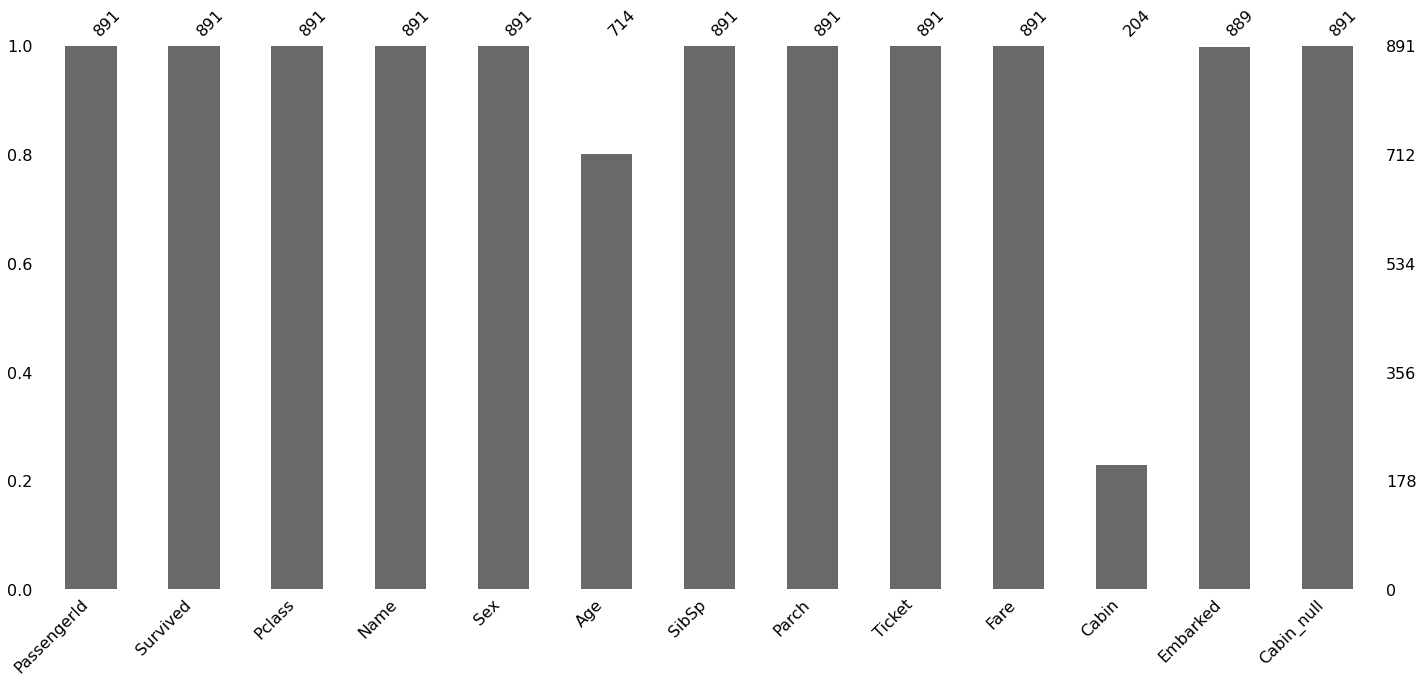

In [165]:
msno.bar(data)

<AxesSubplot:>

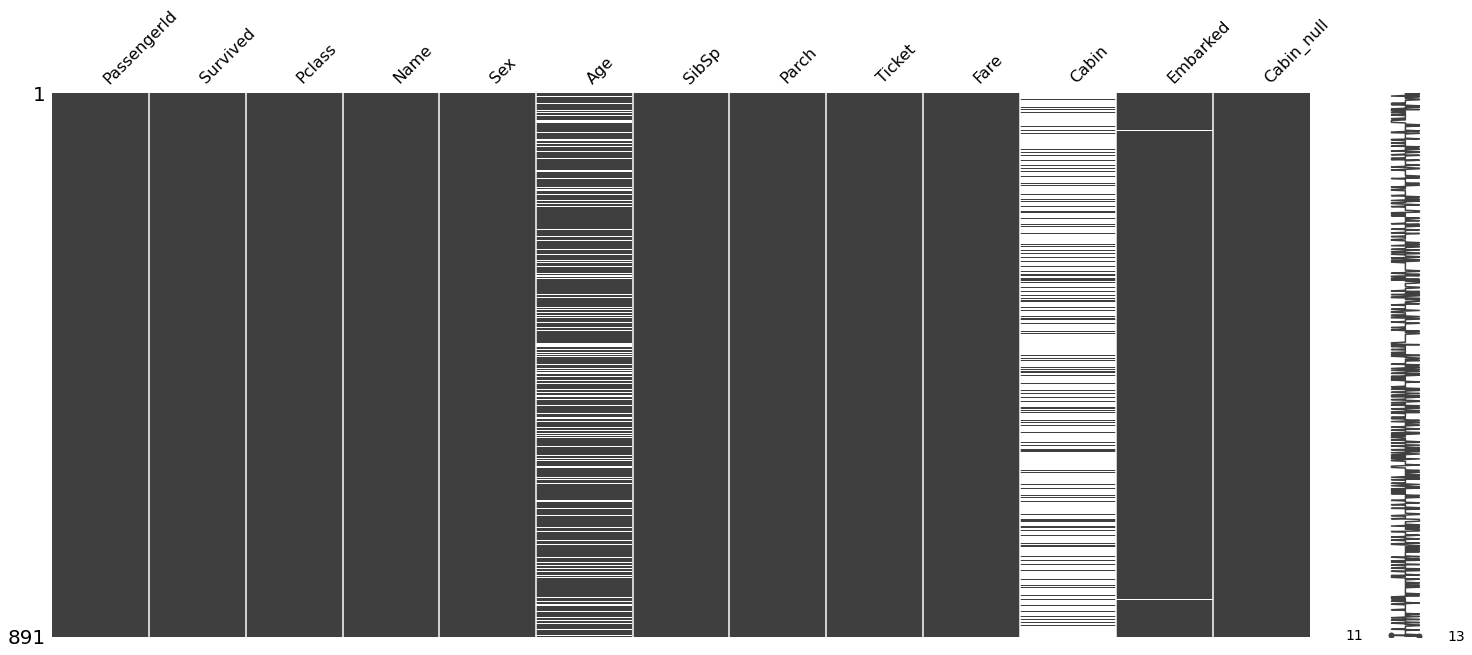

In [167]:
msno.matrix(data)

<AxesSubplot:>

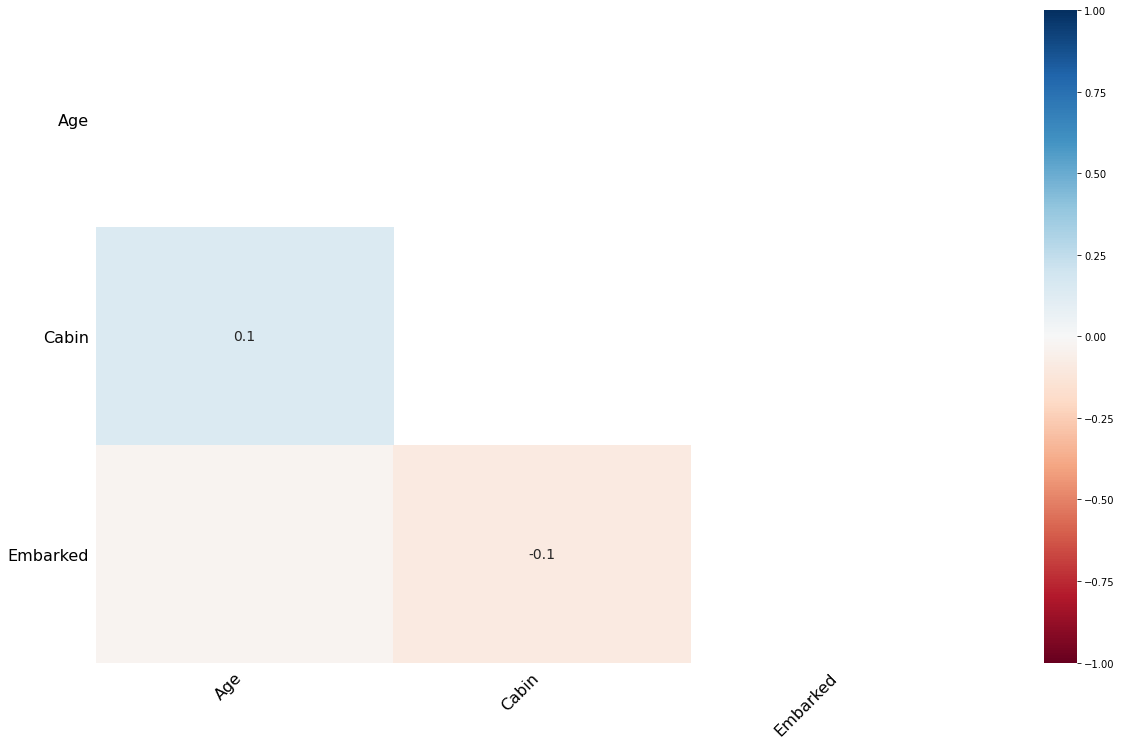

In [168]:
msno.heatmap(data)

# All the Techniques of Handling Missing Values in Continous Features:

<left><img src="https://imgur.com/bL0iHde.png"></left>

- Mean, Median, Mod replacement
- Random Sample imputation 
- Capturing NAN values with a new feature
- End of Distribution imputation
- Arbitrary imputation

# Mean, Median, Mod replacement


This method has the assumption that the data are missing completely at random (MCAR). We solve it by replacing the NAN with the most frequent occurance of the variables.

Advantages:
- Easy to implement (Robust to outliers)
- Faster way to obtain the complete dataset
Disadvatages:
- Change or distortion in the original variance
- Impacts correlation

In [210]:
df = pd.read_csv('https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv', usecols=['Age','Fare','Survived'])

In [211]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [212]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [213]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)

In [214]:
median = df.Age.median()
median

28.0

In [215]:
impute_nan(df,'Age',28)

In [216]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [217]:
print(df.Age.std())
print(df.Age_median.std())

14.526497332334042
13.019696550973201


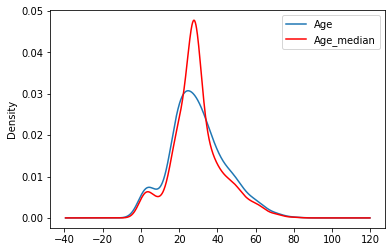

In [218]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

## Using Sklearn

In [17]:
from sklearn.impute import SimpleImputer

In [249]:
train_mean = data.copy()

In [250]:
train_mean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
dtype: int64

In [251]:
train_mean.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_null
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [223]:
train_mean.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_null'],
      dtype='object')

In [224]:
num_col = [col for col in train_mean.columns if train_mean[col].dtypes!= 'O']
num_col

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Cabin_null']

In [252]:
mean_imputer = SimpleImputer(strategy='mean')

In [253]:
train_mean[num_col] = mean_imputer.fit_transform(train_mean[num_col])

In [254]:
train_mean.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Cabin_null       0
dtype: int64

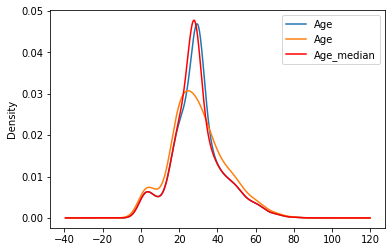

In [257]:
fig = plt.figure()
ax = fig.add_subplot(111)
train_mean['Age'].plot(kind='kde',ax=ax)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

# Random Sample Imputation

It consists of taking random observation from dataset and this observation is used to replace the NAN values. It assumes that the data are missing completely ar random (MCAR)

Advantages:
- Easy to implement
- There is less distortion in variance

Disadvantages:
- In every situation randomness does not work

In [64]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [65]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [66]:
df['Age'].isnull().sum()

177

In [67]:
# Randomly selecting the values so that the number is the same as null values
df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [69]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [74]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+"_random"] = df[variable]
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample

In [78]:
impute_nan(df,"Age",28)

In [82]:
df.tail(10)

,Survived,Age,Fare,Age_median,Age_random
881,0,33.0,7.8958,33.0,33.0
882,0,22.0,10.5167,22.0,22.0
883,0,28.0,10.5000,28.0,28.0
884,0,25.0,7.0500,25.0,25.0
885,0,39.0,29.1250,39.0,39.0
886,0,27.0,13.0000,27.0,27.0
887,1,19.0,30.0000,19.0,19.0
888,0,NaN,23.4500,28.0,15.0
889,1,26.0,30.0000,26.0,26.0
890,0,32.0,7.7500,32.0,32.0


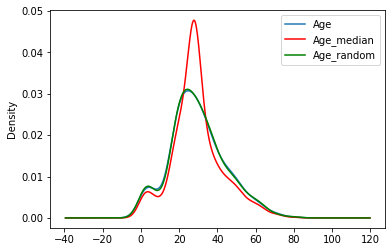

In [83]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['Age_median'].plot(kind='kde',ax=ax,color='red')
df['Age_random'].plot(kind='kde',ax=ax,color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')
plt.show()

# Capturing NAN values with a new feature

The usage is when data are not missing completely at random

Advantages:
- Easy to implement
- Captures the importance of missing values

Disadvantages:
- Creating additional features (Curse of dimensionality)

In [86]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [87]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [88]:
df.tail()

,Survived,Age,Fare,Age_NAN
886,0,27.0,13.00,0
887,1,19.0,30.00,0
888,0,NaN,23.45,1
889,1,26.0,30.00,0
890,0,32.0,7.75,0


# End of Distribution imputation

The usage is when data are not missing completely at random

Advantages:
- Easy to implement
- Captures the importance of missing if there is one

Disatvantages;
- Distort tthe original distribution of the variable
- If missing value is not important, it may mask the predictive power of the orginal variable by changing the distribution
- If the number of NA is big, it will maks true outliers in the distribution
- If the number of NA is small, the replaced NA may be considered an outlier and pre-processing in a subsequent of feature engineering

In [93]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

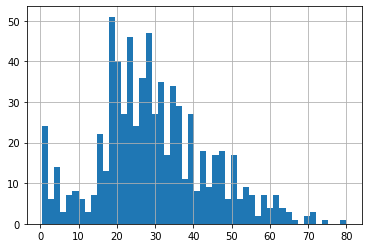

In [95]:
df.Age.hist(bins=50)

In [105]:
extreme = df.Age.mean() + 3 * df.Age.std()
extreme

73.27860964406094

<AxesSubplot:xlabel='Age'>

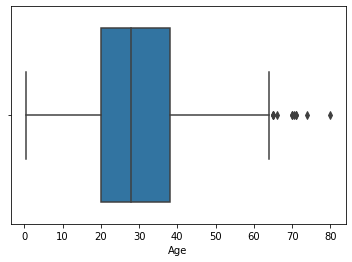

In [103]:
sns.boxplot(x="Age",data=df)

In [106]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)

In [107]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [109]:
df.tail()

,Survived,Age,Fare,Age_median,Age_end_distribution
886,0,27.0,13.00,27.0,27.00000
887,1,19.0,30.00,19.0,19.00000
888,0,NaN,23.45,28.0,73.27861
889,1,26.0,30.00,26.0,26.00000
890,0,32.0,7.75,32.0,32.00000


<AxesSubplot:>

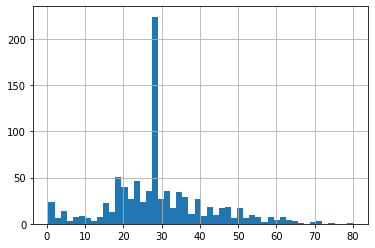

In [110]:
df.Age_median.hist(bins=50)

<AxesSubplot:>

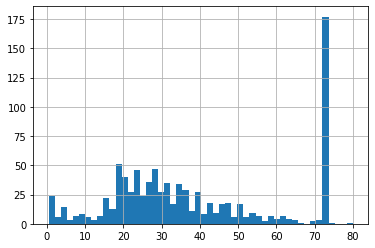

In [111]:
df.Age_end_distribution.hist(bins=50)

<AxesSubplot:xlabel='Age_end_distribution'>

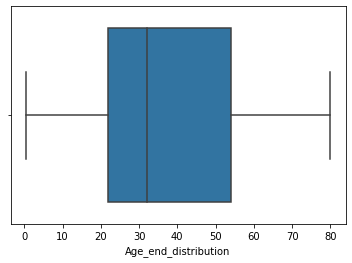

In [112]:
sns.boxplot(x="Age_end_distribution",data=df)

# Arbitrary imputation

It consists of replacing NAN by an arbitrary value. This technique was derived from Kaggle competition.

Arbitrary value:
- It should be more frequently present. The last outlier or the first one usually selected based on the histogram

Advantages:
- Easy to implement
- Captures the importance of missingness if there is

Disadvantages:
- Distort the original distribution of the variable
- If missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
- Hard to decide which value to use

In [114]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

# Handling Missing Values in Categorical feartures

## Frequent categories imputation 

Advantage:

* Easy and fast to implement

Disadvantage:

* This method is not useful when there is many NAN since more frequent label can be used in over represented way. 
* This distorts the relationship between the most frequent label.

In [2]:
os.chdir('/scicore/home/roeoesli/valipo0000/training')

In [138]:
df = pd.read_csv('train_price.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [139]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

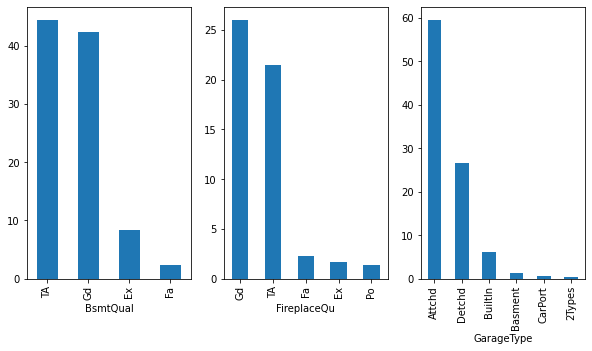

In [16]:
# For the columns with lower missing values, most frequent value can be used
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
axs = axs.ravel()

for i,col in enumerate(df.columns[:3]):
    (df.groupby(col).size()/len(df)*100).sort_values(ascending=False).plot.bar(ax=axs[i])

In [18]:
from sklearn.impute import SimpleImputer

In [60]:
miss_col = df.columns[df.isnull().any()]

In [73]:
for i in miss_col:
    contant_imputer = SimpleImputer(strategy='constant', fill_value=df[i].mode()[0],add_indicator=True)
    df[i] = contant_imputer.fit_transform(df[[i]])

In [67]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

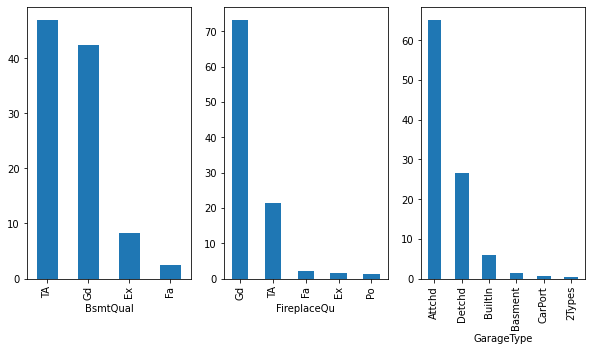

In [63]:
# For the columns with lower missing values, most frequent value can be used
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(10,5))
axs = axs.ravel()

for i,col in enumerate(df.columns[:3]):
    (df.groupby(col).size()/len(df)*100).sort_values(ascending=False).plot.bar(ax=axs[i])

# Add indicator for missing value

After indicator, you can fill the missing values with most frequent values
* This method would increase the number of the features

In [115]:
from sklearn.impute import MissingIndicator

In [116]:
mi = MissingIndicator(features='missing-only')

In [117]:
miss_col = df.columns[df.isnull().any()]

In [118]:
mi.fit(df[miss_col])

MissingIndicator()

In [123]:
pd.concat([df,pd.DataFrame(mi.transform(df[miss_col]),dtype='int',columns=[i+'_' for i in miss_col])],axis=1)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_,FireplaceQu_,GarageType_
0,Gd,NaN,Attchd,208500,0,1,0
1,Gd,TA,Attchd,181500,0,0,0
2,Gd,TA,Attchd,223500,0,0,0
3,TA,Gd,Detchd,140000,0,0,0
4,Gd,TA,Attchd,250000,0,0,0
...,...,...,...,...,...,...,...
1455,Gd,TA,Attchd,175000,0,0,0
1456,Gd,TA,Attchd,210000,0,0,0
1457,TA,Gd,Attchd,266500,0,0,0
1458,TA,NaN,Attchd,142125,0,1,0


# Replace the NAN with new category

In [145]:
contant_imputer = SimpleImputer(strategy='constant', fill_value='missing',add_indicator=True)
new_df = pd.DataFrame(contant_imputer.fit_transform(df[miss_col]),columns=list(miss_col)+[i+'_' for i in miss_col])
new_df

,BsmtQual,FireplaceQu,GarageType,BsmtQual_,FireplaceQu_,GarageType_
0,Gd,missing,Attchd,False,True,False
1,Gd,TA,Attchd,False,False,False
2,Gd,TA,Attchd,False,False,False
3,TA,Gd,Detchd,False,False,False
4,Gd,TA,Attchd,False,False,False
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,False,False,False
1456,Gd,TA,Attchd,False,False,False
1457,TA,Gd,Attchd,False,False,False
1458,TA,missing,Attchd,False,True,False


In [173]:
new_df.iloc[:,3:] = new_df.iloc[:,3:].astype('int')

In [174]:
new_df

,BsmtQual,FireplaceQu,GarageType,BsmtQual_,FireplaceQu_,GarageType_
0,Gd,missing,Attchd,0,1,0
1,Gd,TA,Attchd,0,0,0
2,Gd,TA,Attchd,0,0,0
3,TA,Gd,Detchd,0,0,0
4,Gd,TA,Attchd,0,0,0
...,...,...,...,...,...,...
1455,Gd,TA,Attchd,0,0,0
1456,Gd,TA,Attchd,0,0,0
1457,TA,Gd,Attchd,0,0,0
1458,TA,missing,Attchd,0,1,0
